In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [14]:
df = pd.read_csv('PM10_data_with_prep.csv')
df

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,54.039377,35.386308,1.285417,5.470588,1.689453,0.7,49.0,30.0,53.0,754.0,0.0,2.4
1,02t,2023-12-01 01:00,56.639373,33.148402,1.199468,11.740741,1.488889,0.8,51.0,29.5,55.0,753.0,0.0,2.1
2,02t,2023-12-01 02:00,56.536504,31.055118,1.121856,16.146341,1.488889,0.4,5.0,29.1,57.0,753.0,0.0,2.5
3,02t,2023-12-01 03:00,56.536504,28.648649,1.266667,8.291667,1.488889,0.4,30.0,28.5,60.0,753.0,0.0,2.3
4,02t,2023-12-01 04:00,54.039377,28.158986,1.415610,22.500000,1.488889,0.7,19.0,28.1,62.0,753.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67400,93t,2024-01-02 20:00,19.000000,25.000000,0.050000,1.000000,1.689453,3.5,63.0,28.9,80.0,754.0,0.0,2.9
67401,93t,2024-01-02 21:00,26.000000,22.000000,0.050000,1.000000,2.149923,3.1,51.0,28.4,81.0,755.0,0.0,3.3
67402,93t,2024-01-02 22:00,22.000000,21.000000,0.050000,1.000000,2.149923,2.8,43.0,28.1,81.0,755.0,0.0,2.5
67403,93t,2024-01-02 23:00,20.000000,20.000000,0.050000,1.000000,2.149923,3.6,37.0,27.9,82.0,755.0,0.0,1.7


In [15]:
df.isnull().sum()

stationID                   0
datetime                    0
pm10                        0
o3                          0
co                          0
no2                         0
so2                         0
ws                          0
wd                          0
temp                        0
rh                          0
bp                          0
rain                        0
Traffic congestion index    0
dtype: int64

### **แยก ตัวแปรอิสระ(x) ตัวแปรตาม(y)**

In [16]:
X = df[['o3', 'co', 'no2', 'so2','ws', 'wd', 'temp', 'rh','Traffic congestion index']]
y = df[['pm10']]

In [17]:
X

,o3,co,no2,so2,ws,wd,temp,rh,Traffic congestion index
0,35.386308,1.285417,5.470588,1.689453,0.7,49.0,30.0,53.0,2.4
1,33.148402,1.199468,11.740741,1.488889,0.8,51.0,29.5,55.0,2.1
2,31.055118,1.121856,16.146341,1.488889,0.4,5.0,29.1,57.0,2.5
3,28.648649,1.266667,8.291667,1.488889,0.4,30.0,28.5,60.0,2.3
4,28.158986,1.415610,22.500000,1.488889,0.7,19.0,28.1,62.0,1.8
...,...,...,...,...,...,...,...,...,...
67400,25.000000,0.050000,1.000000,1.689453,3.5,63.0,28.9,80.0,2.9
67401,22.000000,0.050000,1.000000,2.149923,3.1,51.0,28.4,81.0,3.3
67402,21.000000,0.050000,1.000000,2.149923,2.8,43.0,28.1,81.0,2.5
67403,20.000000,0.050000,1.000000,2.149923,3.6,37.0,27.9,82.0,1.7


In [18]:
y

,pm10
0,54.039377
1,56.639373
2,56.536504
3,56.536504
4,54.039377
...,...
67400,19.000000
67401,26.000000
67402,22.000000
67403,20.000000


### **Feature Scaling**

In [19]:
scaler = MinMaxScaler()

In [20]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.24046369, 0.1293526 , 0.04656863, ..., 0.47694754, 0.47747748,
        0.22033898],
       [0.224814  , 0.12063571, 0.11188272, ..., 0.46899841, 0.4954955 ,
        0.16949153],
       [0.21017565, 0.11276427, 0.15777439, ..., 0.46263911, 0.51351351,
        0.23728814],
       ...,
       [0.13986014, 0.0040568 , 0.        , ..., 0.44674086, 0.72972973,
        0.23728814],
       [0.13286713, 0.0040568 , 0.        , ..., 0.44356121, 0.73873874,
        0.10169492],
       [0.15559225, 0.2955665 , 0.35433179, ..., 0.        , 0.        ,
        0.16949153]])

### **แยกชุดข้อมูลออกเป็น(train)และ(test)**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(47183, 9) (20222, 9) (47183, 1) (20222, 9)


In [22]:
y_test

,pm10
53145,53.633302
4788,52.786514
19997,68.000000
42774,57.274156
62361,57.274156
...,...
10822,45.000000
9427,124.000000
23160,56.000000
60057,69.000000


### **Use Model Testing KNeighbors Regression to Prediction**

In [23]:
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [24]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([[49.51990092],
       [52.78651386],
       [65.64      ],
       ...,
       [55.96161948],
       [51.36213026],
       [52.78651386]])

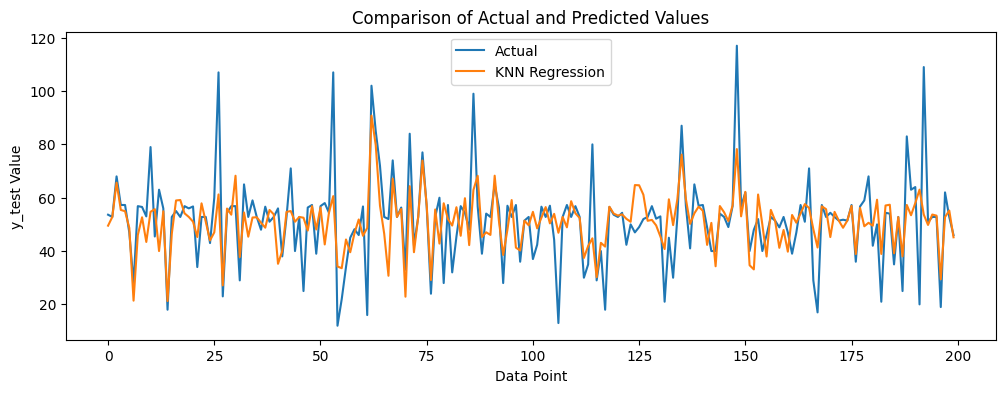

In [25]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from KNN
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Evaluation KNN**

In [26]:
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")

Mean Squared Error: 253.47382876514916
R-squared: 0.30025230860806984


### **Use Model Testing Support Vector Machine to Prediction**

In [27]:
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [28]:
y_svr_pred = svr.predict(X_test)
y_svr_pred

array([54.88973948, 52.7563048 , 57.44214927, ..., 57.72335938,
       50.59264632, 52.7994024 ])

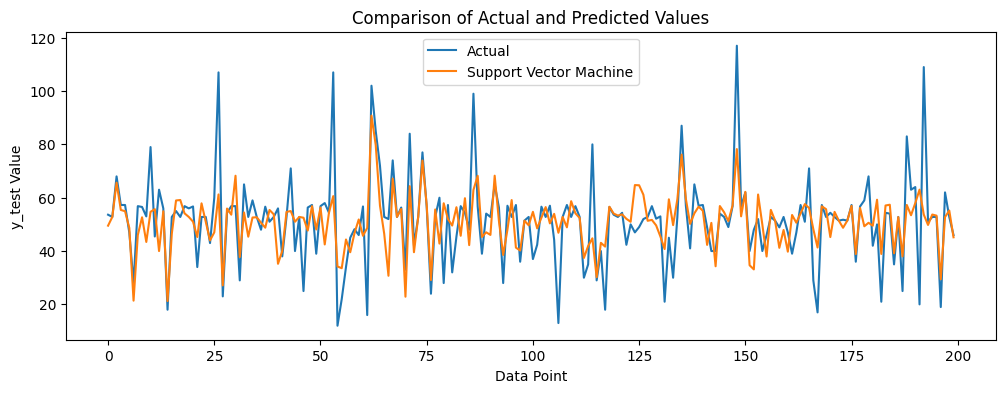

In [29]:
plt.figure(figsize=(12, 4))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from SVR
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='Support Vector Machine')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

### **Evaluation KNN**

In [30]:
svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_r2 = r2_score(y_test, y_svr_pred)

print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")

Mean Squared Error: 319.3010562208497
R-squared: 0.11852762852073773


### **รวมกราฟ**

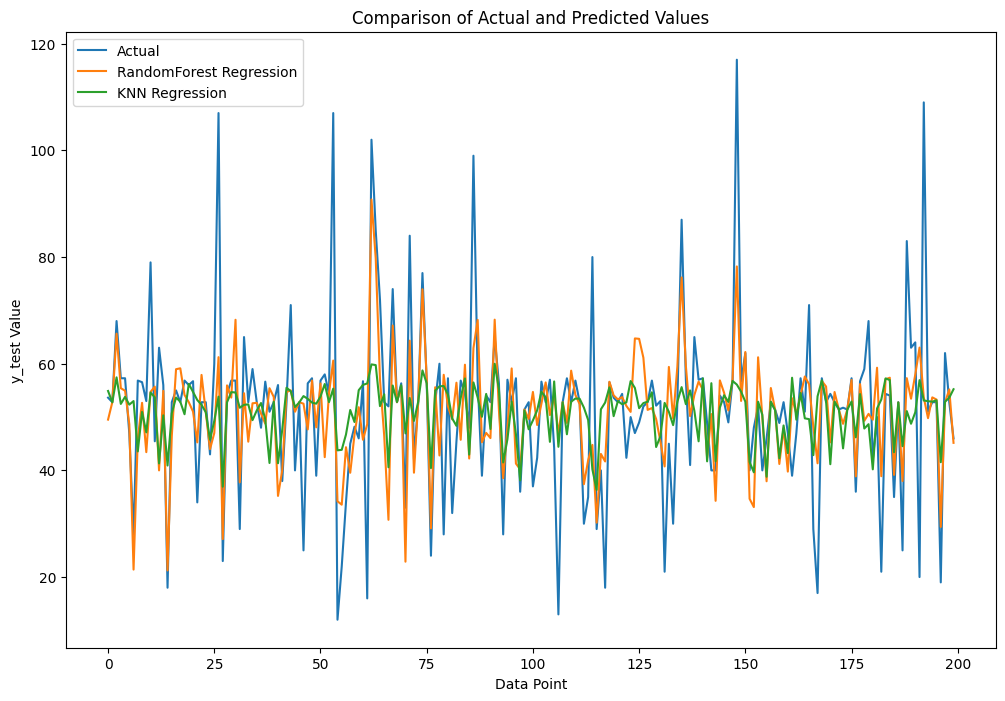

In [31]:
plt.figure(figsize=(12, 8))

# Plot the actual values
sns.lineplot(x=range(200), y=y_test.iloc[:200, 0], label='Actual')

# Plot the predicted values from RandomForest Regression
sns.lineplot(x=range(200), y=y_knn_pred[:200][:,0], label='RandomForest Regression')

# Plot the predicted values from KNN Regression
sns.lineplot(x=range(200), y=y_svr_pred[:200], label='KNN Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()  # Show legend
plt.show()

### **แสดงข้อมูลและกราฟแท่งและเส้นเพื่อเปรียบเทียบประสิทธิภาพของ K-Nearest Neighbors Regression และ Support Vector Machine**

In [32]:
data = {'model': ['K-Nearest Neighbors Regression', 'Support Vector Machine'],
        'MSE': [knn_mse, svr_mse],
        'R^2': [knn_r2, svr_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MSE,R^2
0,K-Nearest Neighbors Regression,253.473829,0.300252
1,Support Vector Machine,319.301056,0.118528


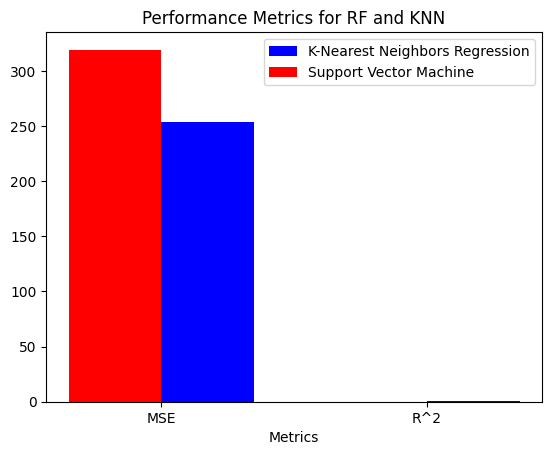

In [33]:
N = 2
ind = np.arange(N)
width = 0.35

kn_metrics = [knn_mse, knn_r2]
svr_metrics = [svr_mse, svr_r2]

fig, ax = plt.subplots()
rects1 = ax.bar(ind + width, kn_metrics, width, label='K-Nearest Neighbors Regression', color='b')
rects2 = ax.bar(ind, svr_metrics, width, label='Support Vector Machine', color='r')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['MSE', 'R^2'])
ax.legend()

plt.show()

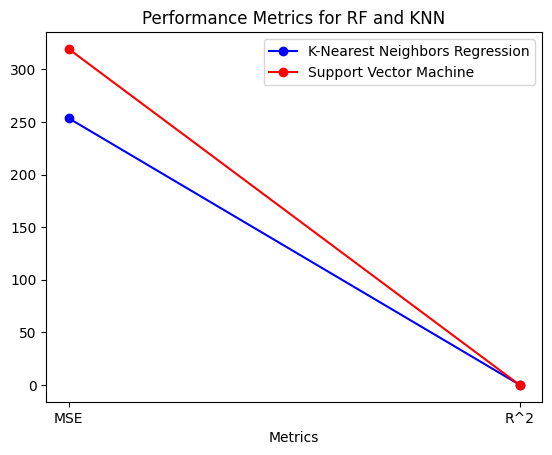

In [34]:
N = 2
ind = np.arange(N)
width = 0.35

kn_metrics = [knn_mse, knn_r2]
svr_metrics = [svr_mse, svr_r2]

fig, ax = plt.subplots()

ax.plot(ind, kn_metrics, label='K-Nearest Neighbors Regression', marker='o', linestyle='-', color='b')
ax.plot(ind, svr_metrics, label='Support Vector Machine', marker='o', linestyle='-', color='r')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind)
ax.set_xticklabels(['MSE', 'R^2'])
ax.legend()

plt.show()